In [1]:
#Importing the necessary libraries for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skmultiflow.data import DataStream
from skmultiflow.drift_detection.eddm import EDDM
from skmultiflow.drift_detection.hddm_a import HDDM_A
from skmultiflow.drift_detection.hddm_w import HDDM_W
from skmultiflow.drift_detection import PageHinkley, DDM
from skmultiflow.drift_detection import ADWIN


In [2]:
# Read in  Weather Tabular data

data= pd.read_csv("weatherAUS.csv")

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
# Data Exploration, Finding the missing values, Performing EDA( Exploratory data analysis)

data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [5]:
#Dimensions of the data
data.shape

(142193, 24)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
# Looking at the describe to get the statistical information of each columns
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [5]:
#Performance of Feature Engineering Techniques, We begin by performing Mean Median Imputation on the Missing values
# with less number of nans
def impute_nan(data, variable):
    
    data[variable+"_median"]= data[variable].fillna(data[variable].median())

In [9]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [6]:
nr_cols_float = list(data.select_dtypes(include='number').columns)

In [59]:
nr_cols_float

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

In [60]:
data.head()
    

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [7]:
#we iterated through the list  of the floating type columns and called the impute_nan fuction to perform the 
## Mean-Median-Mode Imputation
for i in nr_cols_float:
    impute_nan(data, i)

In [8]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm_median,Humidity9am_median,Humidity3pm_median,Pressure9am_median,Pressure3pm_median,Cloud9am_median,Cloud3pm_median,Temp9am_median,Temp3pm_median,RISK_MM_median
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2


In [63]:
#To check if the operation was successful
data.isnull().sum()

Date                        0
Location                    0
MinTemp                   637
MaxTemp                   322
Rainfall                 1406
Evaporation             60843
Sunshine                67816
WindGustDir              9330
WindGustSpeed            9270
WindDir9am              10013
WindDir3pm               3778
WindSpeed9am             1348
WindSpeed3pm             2630
Humidity9am              1774
Humidity3pm              3610
Pressure9am             14014
Pressure3pm             13981
Cloud9am                53657
Cloud3pm                57094
Temp9am                   904
Temp3pm                  2726
RainToday                1406
RISK_MM                     0
RainTomorrow                0
MinTemp_median              0
MaxTemp_median              0
Rainfall_median             0
Evaporation_median          0
Sunshine_median             0
WindGustSpeed_median        0
WindSpeed9am_median         0
WindSpeed3pm_median         0
Humidity9am_median          0
Humidity3p

In [64]:
%matplotlib inline

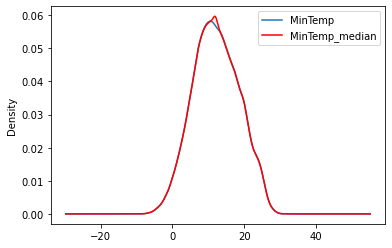

In [67]:
# Comparing the difference in the distribution of the features
fig = plt.figure()
ax= fig. add_subplot(111)
data['MinTemp'].plot(kind= 'kde', ax =ax)
data['MinTemp_median'].plot(kind= 'kde', ax =ax, color ='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')


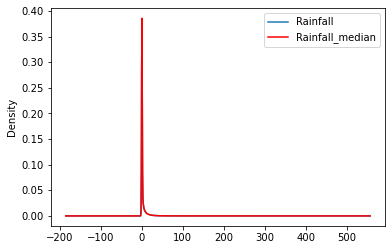

In [69]:
fig = plt.figure()
ax= fig. add_subplot(111)
data['Rainfall'].plot(kind= 'kde', ax =ax)
data['Rainfall_median'].plot(kind= 'kde', ax =ax, color ='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')


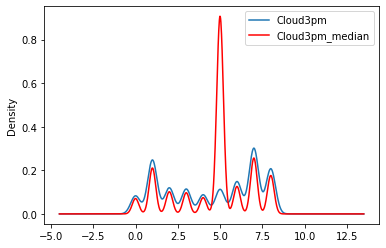

In [70]:
fig = plt.figure()
ax= fig. add_subplot(111)
data['Cloud3pm'].plot(kind= 'kde', ax =ax)
data['Cloud3pm_median'].plot(kind= 'kde', ax =ax, color ='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')


In [72]:
data['Cloud3pm'].isnull().sum()

57094

In [74]:
## Basically it is replacing the the missing values with random samples from the column data, but the problem it is unordered
data['Cloud3pm'].dropna().sample(data['Cloud3pm'].isnull().sum(), random_state=0)


57047     5.0
7237      1.0
116196    7.0
81792     1.0
14434     1.0
         ... 
84124     8.0
37317     7.0
1888      8.0
30032     0.0
23567     8.0
Name: Cloud3pm, Length: 57094, dtype: float64

In [75]:
# Pandas needs to have the same index in order to merge the dataset
data[data['Cloud3pm'].isnull()].index

Int64Index([     0,      1,      3,      5,      6,      7,      8,      9,
                10,     14,
            ...
            142181, 142182, 142183, 142184, 142185, 142187, 142188, 142189,
            142190, 142191],
           dtype='int64', length=57094)

In [78]:
## There is much deviation in the 'Cloud3pm' feature column. This can lead to affecting our model, due to disstortion in variance,
## Therefore we are going to try another technique known as Random Sample Imputation

def impute_nan_1(data, variable):
    data[variable + "_random"]=data[variable]
    random_sample = data[variable].dropna().sample(data[variable].isnull().sum(), random_state=0)
    random_sample.index = data[data[variable].isnull()].index
    data.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [79]:
impute_nan_1(data, 'Cloud3pm')

In [80]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am_median,Humidity3pm_median,Pressure9am_median,Pressure3pm_median,Cloud9am_median,Cloud3pm_median,Temp9am_median,Temp3pm_median,RISK_MM_median,Cloud3pm_random
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0,5.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0,1.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0,2.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,1.0,7.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2,8.0


In [81]:
data.shape

(142193, 42)

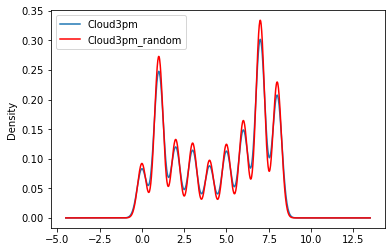

In [82]:
# Comparing the distribution using random sample imputation 

fig = plt.figure()
ax= fig. add_subplot(111)
data['Cloud3pm'].plot(kind= 'kde', ax =ax)
data['Cloud3pm_random'].plot(kind= 'kde', ax =ax, color ='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

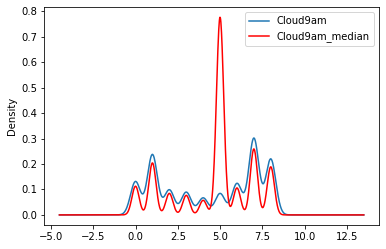

In [84]:
fig = plt.figure()
ax= fig. add_subplot(111)
data['Cloud9am'].plot(kind= 'kde', ax =ax)
data['Cloud9am_median'].plot(kind= 'kde', ax =ax, color ='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

In [85]:
# Using the Random sample imputation technique
impute_nan_1(data, 'Cloud9am')

In [86]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm_median,Pressure9am_median,Pressure3pm_median,Cloud9am_median,Cloud3pm_median,Temp9am_median,Temp3pm_median,RISK_MM_median,Cloud3pm_random,Cloud9am_random
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0,5.0,8.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0,1.0,5.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0,2.0,1.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,1.0,7.0,7.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2,8.0,7.0


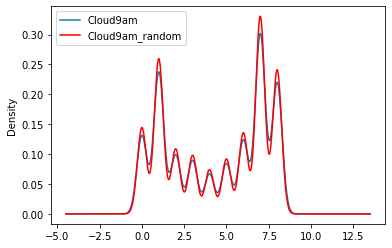

In [87]:
fig = plt.figure()
ax= fig. add_subplot(111)
data['Cloud9am'].plot(kind= 'kde', ax =ax)
data['Cloud9am_random'].plot(kind= 'kde', ax =ax, color ='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

In [89]:
# Working on the Object columns
nr_cols_string = list(data.select_dtypes(include='object').columns)

In [90]:
nr_cols_string

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [92]:
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [93]:
## To get the number of unique Features in each column
for features in nr_cols_string:
    print( features,":", len(data[features].unique()), 'labels')

Date : 3436 labels
Location : 49 labels
WindGustDir : 17 labels
WindDir9am : 17 labels
WindDir3pm : 17 labels
RainToday : 3 labels
RainTomorrow : 2 labels


In [94]:
# Replacing Nan values in Object Type column by using Frequent Category Imputation

list_0 =['WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday']


In [96]:
data['WindDir9am'].value_counts().index[0]

'N'

In [97]:
def impute_nan_2(data, variable):
    most_frequent_category = data[variable].value_counts().index[0]
    data[variable].fillna(most_frequent_category, inplace= True)

In [98]:
for features in list_0:
    impute_nan_2(data, features)

In [99]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm_median,Pressure9am_median,Pressure3pm_median,Cloud9am_median,Cloud3pm_median,Temp9am_median,Temp3pm_median,RISK_MM_median,Cloud3pm_random,Cloud9am_random
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0,5.0,8.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0,1.0,5.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0,2.0,1.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,1.0,7.0,7.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2,8.0,7.0


In [100]:
data.isnull().sum()

Date                        0
Location                    0
MinTemp                   637
MaxTemp                   322
Rainfall                 1406
Evaporation             60843
Sunshine                67816
WindGustDir                 0
WindGustSpeed            9270
WindDir9am                  0
WindDir3pm                  0
WindSpeed9am             1348
WindSpeed3pm             2630
Humidity9am              1774
Humidity3pm              3610
Pressure9am             14014
Pressure3pm             13981
Cloud9am                53657
Cloud3pm                57094
Temp9am                   904
Temp3pm                  2726
RainToday                   0
RISK_MM                     0
RainTomorrow                0
MinTemp_median              0
MaxTemp_median              0
Rainfall_median             0
Evaporation_median          0
Sunshine_median             0
WindGustSpeed_median        0
WindSpeed9am_median         0
WindSpeed3pm_median         0
Humidity9am_median          0
Humidity3p

In [102]:
# Converting the Date time series to number of days, we have
data['Date'] = pd.to_datetime(data['Date']).sub(pd.Timestamp('2008-12-01')).dt.days

In [103]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm_median,Pressure9am_median,Pressure3pm_median,Cloud9am_median,Cloud3pm_median,Temp9am_median,Temp3pm_median,RISK_MM_median,Cloud3pm_random,Cloud9am_random
0,0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0,5.0,8.0
1,1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0,1.0,5.0
2,2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0,2.0,1.0
3,3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,1.0,7.0,7.0
4,4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2,8.0,7.0


In [104]:
# Dropping columns we are not using we have
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'MinTemp_median',
       'MaxTemp_median', 'Rainfall_median', 'Evaporation_median',
       'Sunshine_median', 'WindGustSpeed_median', 'WindSpeed9am_median',
       'WindSpeed3pm_median', 'Humidity9am_median', 'Humidity3pm_median',
       'Pressure9am_median', 'Pressure3pm_median', 'Cloud9am_median',
       'Cloud3pm_median', 'Temp9am_median', 'Temp3pm_median', 'RISK_MM_median',
       'Cloud3pm_random', 'Cloud9am_random'],
      dtype='object')

In [105]:
column_drop = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

In [106]:
data.drop(column_drop, axis = 1, inplace = True) 

In [109]:
data.drop(['Location'], axis = 1, inplace = True) 

In [110]:
data.head()

,Date,WindGustDir,WindDir9am,WindDir3pm,RainToday,RISK_MM,RainTomorrow,MinTemp_median,MaxTemp_median,Rainfall_median,...,Humidity3pm_median,Pressure9am_median,Pressure3pm_median,Cloud9am_median,Cloud3pm_median,Temp9am_median,Temp3pm_median,RISK_MM_median,Cloud3pm_random,Cloud9am_random
0,0,W,W,WNW,No,0.0,No,13.4,22.9,0.6,...,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0,5.0,8.0
1,1,WNW,NNW,WSW,No,0.0,No,7.4,25.1,0.0,...,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0,1.0,5.0
2,2,WSW,W,WSW,No,0.0,No,12.9,25.7,0.0,...,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0,2.0,1.0
3,3,NE,SE,E,No,1.0,No,9.2,28.0,0.0,...,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,1.0,7.0,7.0
4,4,W,ENE,NW,No,0.2,No,17.5,32.3,1.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2,8.0,7.0


In [111]:
data.isnull().sum()

Date                    0
WindGustDir             0
WindDir9am              0
WindDir3pm              0
RainToday               0
RISK_MM                 0
RainTomorrow            0
MinTemp_median          0
MaxTemp_median          0
Rainfall_median         0
Evaporation_median      0
Sunshine_median         0
WindGustSpeed_median    0
WindSpeed9am_median     0
WindSpeed3pm_median     0
Humidity9am_median      0
Humidity3pm_median      0
Pressure9am_median      0
Pressure3pm_median      0
Cloud9am_median         0
Cloud3pm_median         0
Temp9am_median          0
Temp3pm_median          0
RISK_MM_median          0
Cloud3pm_random         0
Cloud9am_random         0
dtype: int64

In [112]:
# Performing One Hot Coding on the Object type column by selecting the top 10 most frequent categories for those with many categories

top_10 = [x for x in data.WindGustDir.value_counts().sort_values(ascending=False).head(10).index]



In [113]:
top_10

['W', 'SE', 'E', 'N', 'SSE', 'S', 'WSW', 'SW', 'SSW', 'WNW']

In [138]:
type(top_10)

list

In [139]:
for label in top_10:
    data[label]= np.where(data['WindGustDir']==label,1,0)

In [140]:
data.head()

,Unnamed: 0,Date,WindGustDir,WindDir9am,WindDir3pm,RainToday,RISK_MM,RainTomorrow,MinTemp_median,MaxTemp_median,...,W,SE,E,N,SSE,S,WSW,SW,SSW,WNW
0,0,0,W,W,WNW,No,0.0,No,13.4,22.9,...,1,0,0,0,0,0,0,0,0,0
1,1,1,WNW,NNW,WSW,No,0.0,No,7.4,25.1,...,0,0,0,0,0,0,0,0,0,1
2,2,2,WSW,W,WSW,No,0.0,No,12.9,25.7,...,0,0,0,0,0,0,1,0,0,0
3,3,3,NE,SE,E,No,1.0,No,9.2,28.0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,W,ENE,NW,No,0.2,No,17.5,32.3,...,1,0,0,0,0,0,0,0,0,0


In [141]:
data.drop(['Unnamed: 0'], axis = 1,inplace = True)

In [142]:
data.head()

,Date,WindGustDir,WindDir9am,WindDir3pm,RainToday,RISK_MM,RainTomorrow,MinTemp_median,MaxTemp_median,Rainfall_median,...,W,SE,E,N,SSE,S,WSW,SW,SSW,WNW
0,0,W,W,WNW,No,0.0,No,13.4,22.9,0.6,...,1,0,0,0,0,0,0,0,0,0
1,1,WNW,NNW,WSW,No,0.0,No,7.4,25.1,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2,WSW,W,WSW,No,0.0,No,12.9,25.7,0.0,...,0,0,0,0,0,0,1,0,0,0
3,3,NE,SE,E,No,1.0,No,9.2,28.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,W,ENE,NW,No,0.2,No,17.5,32.3,1.0,...,1,0,0,0,0,0,0,0,0,0


In [143]:
data.drop(['WindGustDir'], axis = 1,inplace = True)

In [144]:
data.head()

,Date,WindDir9am,WindDir3pm,RainToday,RISK_MM,RainTomorrow,MinTemp_median,MaxTemp_median,Rainfall_median,Evaporation_median,...,W,SE,E,N,SSE,S,WSW,SW,SSW,WNW
0,0,W,WNW,No,0.0,No,13.4,22.9,0.6,4.8,...,1,0,0,0,0,0,0,0,0,0
1,1,NNW,WSW,No,0.0,No,7.4,25.1,0.0,4.8,...,0,0,0,0,0,0,0,0,0,1
2,2,W,WSW,No,0.0,No,12.9,25.7,0.0,4.8,...,0,0,0,0,0,0,1,0,0,0
3,3,SE,E,No,1.0,No,9.2,28.0,0.0,4.8,...,0,0,0,0,0,0,0,0,0,0
4,4,ENE,NW,No,0.2,No,17.5,32.3,1.0,4.8,...,1,0,0,0,0,0,0,0,0,0


In [146]:
top_10_1

['N', 'SE', 'E', 'SSE', 'NW', 'S', 'W', 'SW', 'NNE', 'NNW']

In [ ]:
#def one_top_x(data, variable, top_10_labels):
    #for label in top_10_labels:
        
        #data[variable+'_'+ label]=np.where(data[variable]==label, 1, 0)
        

In [148]:
for feature in top_10_1:
    data[feature]= np.where(data['WindDir9am']== feature,1,0)

In [149]:
data.head()

,Date,WindDir9am,WindDir3pm,RainToday,RISK_MM,RainTomorrow,MinTemp_median,MaxTemp_median,Rainfall_median,Evaporation_median,...,N,SSE,S,WSW,SW,SSW,WNW,NW,NNE,NNW
0,0,W,WNW,No,0.0,No,13.4,22.9,0.6,4.8,...,0,0,0,0,0,0,0,0,0,0
1,1,NNW,WSW,No,0.0,No,7.4,25.1,0.0,4.8,...,0,0,0,0,0,0,1,0,0,1
2,2,W,WSW,No,0.0,No,12.9,25.7,0.0,4.8,...,0,0,0,1,0,0,0,0,0,0
3,3,SE,E,No,1.0,No,9.2,28.0,0.0,4.8,...,0,0,0,0,0,0,0,0,0,0
4,4,ENE,NW,No,0.2,No,17.5,32.3,1.0,4.8,...,0,0,0,0,0,0,0,0,0,0


In [150]:
data.drop(['WindDir9am'], axis = 1,inplace = True)

In [151]:
data.head()

,Date,WindDir3pm,RainToday,RISK_MM,RainTomorrow,MinTemp_median,MaxTemp_median,Rainfall_median,Evaporation_median,Sunshine_median,...,N,SSE,S,WSW,SW,SSW,WNW,NW,NNE,NNW
0,0,WNW,No,0.0,No,13.4,22.9,0.6,4.8,8.5,...,0,0,0,0,0,0,0,0,0,0
1,1,WSW,No,0.0,No,7.4,25.1,0.0,4.8,8.5,...,0,0,0,0,0,0,1,0,0,1
2,2,WSW,No,0.0,No,12.9,25.7,0.0,4.8,8.5,...,0,0,0,1,0,0,0,0,0,0
3,3,E,No,1.0,No,9.2,28.0,0.0,4.8,8.5,...,0,0,0,0,0,0,0,0,0,0
4,4,NW,No,0.2,No,17.5,32.3,1.0,4.8,8.5,...,0,0,0,0,0,0,0,0,0,0


In [154]:
top_10_2 = [x for x in data.WindDir3pm.value_counts().sort_values(ascending=False).head(10).index]

In [155]:
for feature in top_10_2:
    data[feature]= np.where(data['WindDir3pm']== feature,1,0)

In [156]:
data.head()

,Date,WindDir3pm,RainToday,RISK_MM,RainTomorrow,MinTemp_median,MaxTemp_median,Rainfall_median,Evaporation_median,Sunshine_median,...,SSE,S,WSW,SW,SSW,WNW,NW,NNE,NNW,ESE
0,0,WNW,No,0.0,No,13.4,22.9,0.6,4.8,8.5,...,0,0,0,0,0,1,0,0,0,0
1,1,WSW,No,0.0,No,7.4,25.1,0.0,4.8,8.5,...,0,0,1,0,0,0,0,0,1,0
2,2,WSW,No,0.0,No,12.9,25.7,0.0,4.8,8.5,...,0,0,1,0,0,0,0,0,0,0
3,3,E,No,1.0,No,9.2,28.0,0.0,4.8,8.5,...,0,0,0,0,0,0,0,0,0,0
4,4,NW,No,0.2,No,17.5,32.3,1.0,4.8,8.5,...,0,0,0,0,0,0,1,0,0,0


In [157]:
data.drop(['WindDir3pm'], axis = 1,inplace = True)

In [158]:
data.head()

,Date,RainToday,RISK_MM,RainTomorrow,MinTemp_median,MaxTemp_median,Rainfall_median,Evaporation_median,Sunshine_median,WindGustSpeed_median,...,SSE,S,WSW,SW,SSW,WNW,NW,NNE,NNW,ESE
0,0,No,0.0,No,13.4,22.9,0.6,4.8,8.5,44.0,...,0,0,0,0,0,1,0,0,0,0
1,1,No,0.0,No,7.4,25.1,0.0,4.8,8.5,44.0,...,0,0,1,0,0,0,0,0,1,0
2,2,No,0.0,No,12.9,25.7,0.0,4.8,8.5,46.0,...,0,0,1,0,0,0,0,0,0,0
3,3,No,1.0,No,9.2,28.0,0.0,4.8,8.5,24.0,...,0,0,0,0,0,0,0,0,0,0
4,4,No,0.2,No,17.5,32.3,1.0,4.8,8.5,41.0,...,0,0,0,0,0,0,1,0,0,0


In [161]:
##Performing One hot encoding on RainToday and RainTomorrow
data['RainToday']=pd.get_dummies(data['RainToday'],drop_first= True)



In [162]:
data.head()

,Date,RainToday,RISK_MM,RainTomorrow,MinTemp_median,MaxTemp_median,Rainfall_median,Evaporation_median,Sunshine_median,WindGustSpeed_median,...,SSE,S,WSW,SW,SSW,WNW,NW,NNE,NNW,ESE
0,0,0,0.0,No,13.4,22.9,0.6,4.8,8.5,44.0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0.0,No,7.4,25.1,0.0,4.8,8.5,44.0,...,0,0,1,0,0,0,0,0,1,0
2,2,0,0.0,No,12.9,25.7,0.0,4.8,8.5,46.0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,1.0,No,9.2,28.0,0.0,4.8,8.5,24.0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0.2,No,17.5,32.3,1.0,4.8,8.5,41.0,...,0,0,0,0,0,0,1,0,0,0


In [163]:
data['RainTomorrow']=pd.get_dummies(data['RainTomorrow'],drop_first= True)


In [164]:
data.head()

,Date,RainToday,RISK_MM,RainTomorrow,MinTemp_median,MaxTemp_median,Rainfall_median,Evaporation_median,Sunshine_median,WindGustSpeed_median,...,SSE,S,WSW,SW,SSW,WNW,NW,NNE,NNW,ESE
0,0,0,0.0,0,13.4,22.9,0.6,4.8,8.5,44.0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0.0,0,7.4,25.1,0.0,4.8,8.5,44.0,...,0,0,1,0,0,0,0,0,1,0
2,2,0,0.0,0,12.9,25.7,0.0,4.8,8.5,46.0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,1.0,0,9.2,28.0,0.0,4.8,8.5,24.0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0.2,0,17.5,32.3,1.0,4.8,8.5,41.0,...,0,0,0,0,0,0,1,0,0,0


In [165]:
data.columns

Index(['Date', 'RainToday', 'RISK_MM', 'RainTomorrow', 'MinTemp_median',
       'MaxTemp_median', 'Rainfall_median', 'Evaporation_median',
       'Sunshine_median', 'WindGustSpeed_median', 'WindSpeed9am_median',
       'WindSpeed3pm_median', 'Humidity9am_median', 'Humidity3pm_median',
       'Pressure9am_median', 'Pressure3pm_median', 'Cloud9am_median',
       'Cloud3pm_median', 'Temp9am_median', 'Temp3pm_median', 'RISK_MM_median',
       'Cloud3pm_random', 'Cloud9am_random', 'W', 'SE', 'E', 'N', 'SSE', 'S',
       'WSW', 'SW', 'SSW', 'WNW', 'NW', 'NNE', 'NNW', 'ESE'],
      dtype='object')

In [166]:
# Re-arranging my columns
data= data[['Date', 'RainToday', 'RISK_MM', 'MinTemp_median',
       'MaxTemp_median', 'Rainfall_median', 'Evaporation_median',
       'Sunshine_median', 'WindGustSpeed_median', 'WindSpeed9am_median',
       'WindSpeed3pm_median', 'Humidity9am_median', 'Humidity3pm_median',
       'Pressure9am_median', 'Pressure3pm_median', 'Cloud9am_median',
       'Cloud3pm_median', 'Temp9am_median', 'Temp3pm_median', 'RISK_MM_median',
       'Cloud3pm_random', 'Cloud9am_random', 'W', 'SE', 'E', 'N', 'SSE', 'S',
       'WSW', 'SW', 'SSW', 'WNW', 'NW', 'NNE', 'NNW', 'ESE','RainTomorrow']]

<AxesSubplot:>

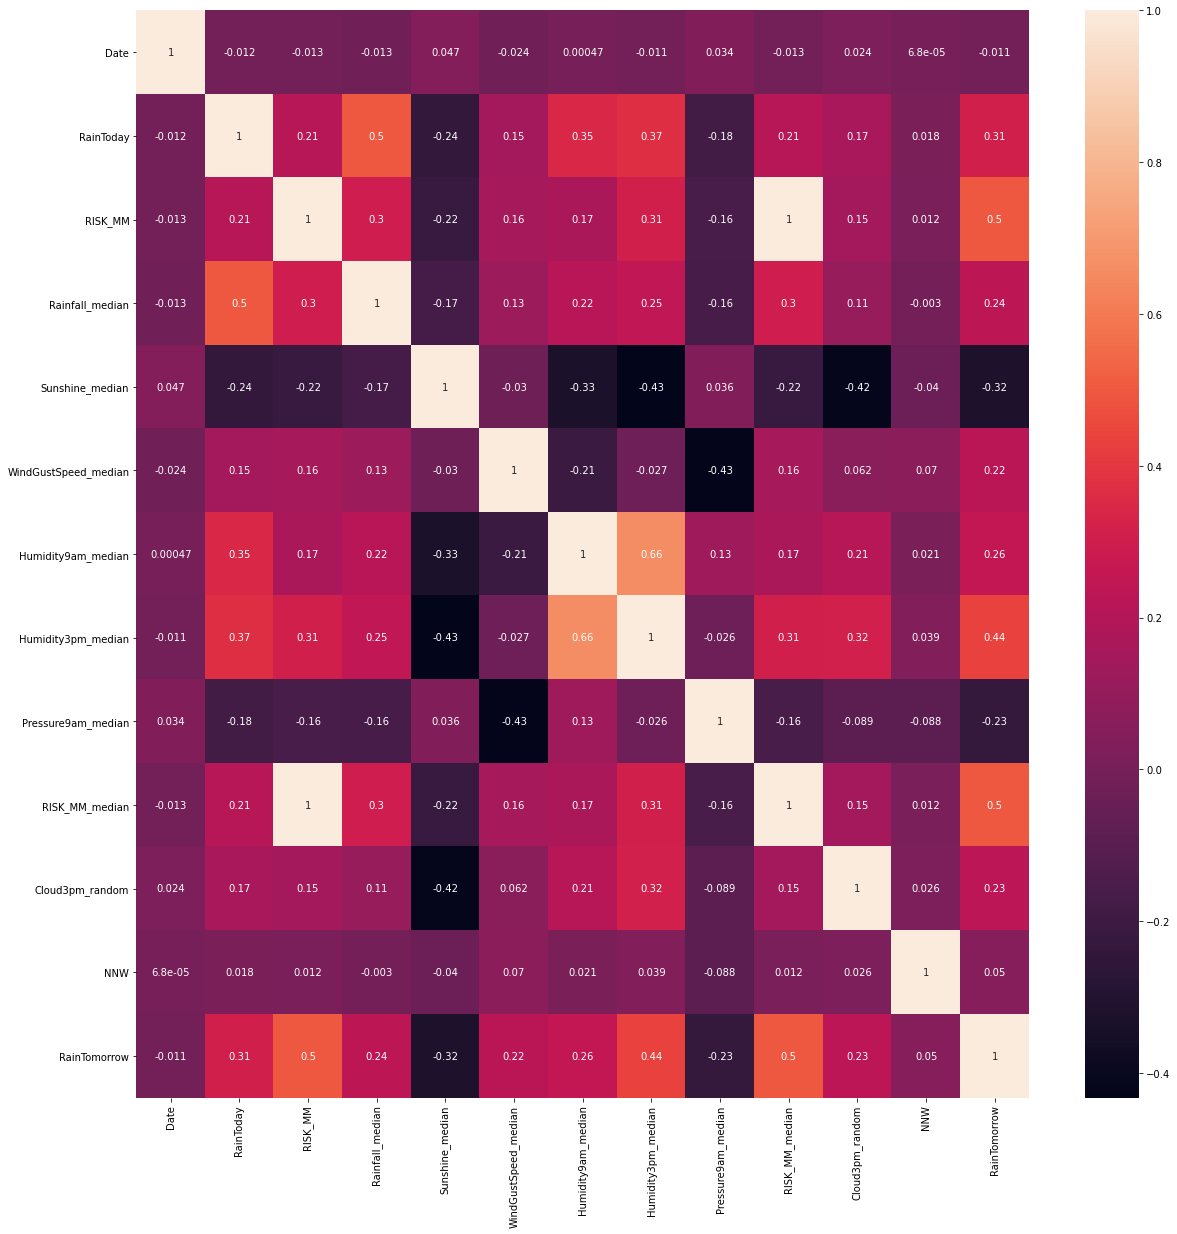

In [240]:
## This shows the correlation between the feature variable
import seaborn as sns
data_corr = data.corr()
top_feat= data_corr.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_feat].corr(), annot=True)

In [167]:
data.head()

,Date,RainToday,RISK_MM,MinTemp_median,MaxTemp_median,Rainfall_median,Evaporation_median,Sunshine_median,WindGustSpeed_median,WindSpeed9am_median,...,S,WSW,SW,SSW,WNW,NW,NNE,NNW,ESE,RainTomorrow
0,0,0,0.0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0.0,7.4,25.1,0.0,4.8,8.5,44.0,4.0,...,0,1,0,0,0,0,0,1,0,0
2,2,0,0.0,12.9,25.7,0.0,4.8,8.5,46.0,19.0,...,0,1,0,0,0,0,0,0,0,0
3,3,0,1.0,9.2,28.0,0.0,4.8,8.5,24.0,11.0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0.2,17.5,32.3,1.0,4.8,8.5,41.0,7.0,...,0,0,0,0,0,1,0,0,0,0


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  142193 non-null  int64  
 1   RainToday             142193 non-null  uint8  
 2   RISK_MM               142193 non-null  float64
 3   MinTemp_median        142193 non-null  float64
 4   MaxTemp_median        142193 non-null  float64
 5   Rainfall_median       142193 non-null  float64
 6   Evaporation_median    142193 non-null  float64
 7   Sunshine_median       142193 non-null  float64
 8   WindGustSpeed_median  142193 non-null  float64
 9   WindSpeed9am_median   142193 non-null  float64
 10  WindSpeed3pm_median   142193 non-null  float64
 11  Humidity9am_median    142193 non-null  float64
 12  Humidity3pm_median    142193 non-null  float64
 13  Pressure9am_median    142193 non-null  float64
 14  Pressure3pm_median    142193 non-null  float64
 15  

In [171]:
data.head()

,Date,RainToday,RISK_MM,MinTemp_median,MaxTemp_median,Rainfall_median,Evaporation_median,Sunshine_median,WindGustSpeed_median,WindSpeed9am_median,...,S,WSW,SW,SSW,WNW,NW,NNE,NNW,ESE,RainTomorrow
0,0,0,0.0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0.0,7.4,25.1,0.0,4.8,8.5,44.0,4.0,...,0,1,0,0,0,0,0,1,0,0
2,2,0,0.0,12.9,25.7,0.0,4.8,8.5,46.0,19.0,...,0,1,0,0,0,0,0,0,0,0
3,3,0,1.0,9.2,28.0,0.0,4.8,8.5,24.0,11.0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0.2,17.5,32.3,1.0,4.8,8.5,41.0,7.0,...,0,0,0,0,0,1,0,0,0,0


In [2]:
data_1 = pd.read_csv('Project_1.csv')

In [19]:
data_1["RainToday"].value_counts(normalize = True) *100

0    77.878658
1    22.121342
Name: RainToday, dtype: float64

In [ ]:
import seaborn as sns
sns.pairplot(data_1, hue="RainTomorrow")
plt.show()

In [ ]:
data.columns

In [173]:
data.to_csv('Project_1.csv')

In [174]:
##Next phase is to perform Feature Selection Technique to pick the best feature columns that are highly correlated to our target variable
## Techniques such as Univariate selection, Feature Importance and InformationGain Techniques
### Splitting data into X and Y

X= data.iloc[:,:-1]
y = data['RainTomorrow']

In [175]:
X.head()

,Date,RainToday,RISK_MM,MinTemp_median,MaxTemp_median,Rainfall_median,Evaporation_median,Sunshine_median,WindGustSpeed_median,WindSpeed9am_median,...,SSE,S,WSW,SW,SSW,WNW,NW,NNE,NNW,ESE
0,0,0,0.0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0.0,7.4,25.1,0.0,4.8,8.5,44.0,4.0,...,0,0,1,0,0,0,0,0,1,0
2,2,0,0.0,12.9,25.7,0.0,4.8,8.5,46.0,19.0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,1.0,9.2,28.0,0.0,4.8,8.5,24.0,11.0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0.2,17.5,32.3,1.0,4.8,8.5,41.0,7.0,...,0,0,0,0,0,0,1,0,0,0


In [176]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: uint8

In [ ]:
### Normalization(Min-Max Normalization)
### Xnorm = (X- Xmin)/(Xmax - Xmin) using MinMaxScaler(), we scale down value between 0 to 1


In [182]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [183]:
X_scaled = pd.DataFrame(min_max.fit_transform(X), columns = X.columns)

In [184]:
X_scaled.head()

,Date,RainToday,RISK_MM,MinTemp_median,MaxTemp_median,Rainfall_median,Evaporation_median,Sunshine_median,WindGustSpeed_median,WindSpeed9am_median,...,SSE,S,WSW,SW,SSW,WNW,NW,NNE,NNW,ESE
0,0.112372,0.0,0.000000,0.516509,0.523629,0.001617,0.033103,0.586207,0.294574,0.153846,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.112656,0.0,0.000000,0.375000,0.565217,0.000000,0.033103,0.586207,0.294574,0.030769,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.112940,0.0,0.000000,0.504717,0.576560,0.000000,0.033103,0.586207,0.310078,0.146154,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.113224,0.0,0.002695,0.417453,0.620038,0.000000,0.033103,0.586207,0.139535,0.084615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.113507,0.0,0.000539,0.613208,0.701323,0.002695,0.033103,0.586207,0.271318,0.053846,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [185]:
from sklearn.feature_selection import SelectKBest

In [186]:
## Chi-2 is used to perform hypothesis testing and statistical analysis
from sklearn.feature_selection import chi2 

In [187]:
ordered_rank_features = SelectKBest(score_func= chi2, k=10)

In [191]:
ordered_feat=ordered_rank_features.fit(X_scaled,y)

In [192]:
ordered_feat

SelectKBest(score_func=<function chi2 at 0x7fa48ec11c10>)

In [193]:
ordered_feat.scores_

array([2.19809380e+00, 1.04066992e+04, 2.93469494e+03, 4.63622058e+01,
       1.22654032e+02, 6.46394627e+02, 1.56903483e+01, 9.80165804e+02,
       2.83479587e+02, 5.01027625e+01, 5.04406796e+01, 4.82403456e+02,
       2.25096720e+03, 1.57694982e+02, 1.22704516e+02, 3.41911669e+00,
       1.72639503e+02, 2.93469494e+03, 1.39184569e+03, 1.18231766e+03,
       5.43704597e+01, 9.36913429e+00, 3.19390355e+02, 1.51588526e+02,
       5.64014851e+01, 3.52332200e+00, 1.60433983e-03, 3.92719676e+01,
       7.36073392e-01, 1.40239515e+02, 1.66121784e+02, 9.12740477e+01,
       3.31592497e+02, 1.43942391e+02])

In [195]:
pd.DataFrame(ordered_feat.scores_)

,0
0,2.198094
1,10406.699232
2,2934.694941
3,46.362206
4,122.654032
5,646.394627
6,15.690348
7,980.165804
8,283.479587
9,50.102762


In [ ]:
##Convert the ordered scores and column title into a dataframe

In [196]:
df_scores = pd.DataFrame(ordered_feat.scores_, columns = ["Score"])

In [197]:
df_columns = pd.DataFrame(X_scaled.columns)

In [198]:
features_rank = pd.concat([df_columns, df_scores], axis = 1)

In [199]:
features_rank.columns = ["Features", "Score"]

In [200]:
features_rank

,Features,Score
0,Date,2.198094
1,RainToday,10406.699232
2,RISK_MM,2934.694941
3,MinTemp_median,46.362206
4,MaxTemp_median,122.654032
5,Rainfall_median,646.394627
6,Evaporation_median,15.690348
7,Sunshine_median,980.165804
8,WindGustSpeed_median,283.479587
9,WindSpeed9am_median,50.102762


In [ ]:
#Top 10 Highest number of correlated features to the target variable

In [201]:
features_rank.nlargest(10, 'Score')

,Features,Score
1,RainToday,10406.699232
2,RISK_MM,2934.694941
17,RISK_MM_median,2934.694941
12,Humidity3pm_median,2250.967199
18,Cloud3pm_random,1391.845691
19,Cloud9am_random,1182.317661
7,Sunshine_median,980.165804
5,Rainfall_median,646.394627
11,Humidity9am_median,482.403456
32,NNW,331.592497


In [205]:
# Finding the top features usin Feature Importance using ExtraTree classifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_scaled,y)
print(model.feature_importances_)

[0.00813903 0.04883111 0.31104502 0.01034432 0.0104927  0.01133639
 0.00702623 0.03450375 0.01913433 0.00872484 0.00942243 0.0164761
 0.09524838 0.01757056 0.01866484 0.00935198 0.01221039 0.29079957
 0.01822431 0.01279932 0.00235324 0.00223701 0.00164999 0.00229824
 0.00177054 0.00211962 0.00212691 0.00191242 0.00227261 0.00234199
 0.00235002 0.00231808 0.00235439 0.00154935]


In [206]:
rank_feat =pd.Series(model.feature_importances_, index = X_scaled.columns)

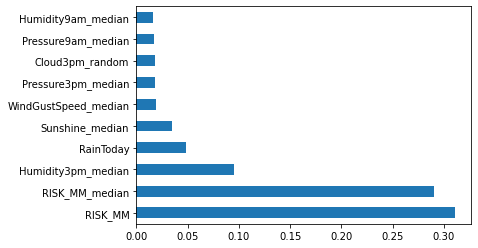

In [207]:
rank_feat.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
## DAta correlataion using Information Gain

In [208]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_scaled, y)

In [210]:
mutual_data = pd.Series(mutual_info, index = X_scaled.columns)
mutual_data.sort_values(ascending = False)

RISK_MM                 0.532153
RISK_MM_median          0.532153
Humidity3pm_median      0.113562
Sunshine_median         0.060316
Rainfall_median         0.054252
Date                    0.047041
RainToday               0.042508
Humidity9am_median      0.039635
Cloud3pm_random         0.031682
Pressure9am_median      0.029483
WindGustSpeed_median    0.025743
Pressure3pm_median      0.025472
Cloud9am_random         0.023588
Temp3pm_median          0.020618
MaxTemp_median          0.013686
Evaporation_median      0.007298
WindSpeed3pm_median     0.006859
MinTemp_median          0.004718
WindSpeed9am_median     0.004700
Temp9am_median          0.002602
E                       0.002254
ESE                     0.002184
SSE                     0.002088
NW                      0.002019
NNE                     0.001525
NNW                     0.000922
SW                      0.000819
S                       0.000768
WSW                     0.000431
SE                      0.000000
SSW       

In [211]:
data.columns

Index(['Date', 'RainToday', 'RISK_MM', 'MinTemp_median', 'MaxTemp_median',
       'Rainfall_median', 'Evaporation_median', 'Sunshine_median',
       'WindGustSpeed_median', 'WindSpeed9am_median', 'WindSpeed3pm_median',
       'Humidity9am_median', 'Humidity3pm_median', 'Pressure9am_median',
       'Pressure3pm_median', 'Temp9am_median', 'Temp3pm_median',
       'RISK_MM_median', 'Cloud3pm_random', 'Cloud9am_random', 'W', 'SE', 'E',
       'N', 'SSE', 'S', 'WSW', 'SW', 'SSW', 'WNW', 'NW', 'NNE', 'NNW', 'ESE',
       'RainTomorrow'],
      dtype='object')

In [214]:
drop_col = [ 'MinTemp_median', 'MaxTemp_median', 'Evaporation_median', 'WindSpeed9am_median', 'WindSpeed3pm_median',
       'Pressure3pm_median', 'Temp9am_median', 'Temp3pm_median', 'Cloud9am_random', 'W', 'SE', 'E',
       'N', 'SSE', 'S', 'WSW', 'SW', 'SSW', 'WNW', 'NW', 'NNE', 'ESE']

In [215]:
data.drop(drop_col, axis =1, inplace = True)

In [216]:
data.head()

,Date,RainToday,RISK_MM,Rainfall_median,Sunshine_median,WindGustSpeed_median,Humidity9am_median,Humidity3pm_median,Pressure9am_median,RISK_MM_median,Cloud3pm_random,NNW,RainTomorrow
0,0,0,0.0,0.6,8.5,44.0,71.0,22.0,1007.7,0.0,5.0,0,0
1,1,0,0.0,0.0,8.5,44.0,44.0,25.0,1010.6,0.0,1.0,1,0
2,2,0,0.0,0.0,8.5,46.0,38.0,30.0,1007.6,0.0,2.0,0,0
3,3,0,1.0,0.0,8.5,24.0,45.0,16.0,1017.6,1.0,7.0,0,0
4,4,0,0.2,1.0,8.5,41.0,82.0,33.0,1010.8,0.2,8.0,0,0


In [217]:
data.to_csv('Project_2.csv')

In [20]:
data = pd.read_csv("Project_2.csv")

In [21]:
## Creating Our LOgistic regression model

X= data.iloc[:,:-1]
y = data['RainTomorrow']

In [ ]:
# Logistic Regression is a popularly known algorithm for Classification problems
It takes in any value and outputs within the range of 0 to 1 using the sigmoid function
S(x)= 1/1+e^-z
if you have a linear model
y = b0 + b1X
P = 1/1 + e^(b0 + b1X)
it results to a probability between 0 and 1

In [22]:
X.head()

,Unnamed: 0,Date,RainToday,RISK_MM,Rainfall_median,Sunshine_median,WindGustSpeed_median,Humidity9am_median,Humidity3pm_median,Pressure9am_median,RISK_MM_median,Cloud3pm_random,NNW
0,0,0,0,0.0,0.6,8.5,44.0,71.0,22.0,1007.7,0.0,5.0,0
1,1,1,0,0.0,0.0,8.5,44.0,44.0,25.0,1010.6,0.0,1.0,1
2,2,2,0,0.0,0.0,8.5,46.0,38.0,30.0,1007.6,0.0,2.0,0
3,3,3,0,1.0,0.0,8.5,24.0,45.0,16.0,1017.6,1.0,7.0,0
4,4,4,0,0.2,1.0,8.5,41.0,82.0,33.0,1010.8,0.2,8.0,0


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()


In [26]:
df_scaled = scaler.fit_transform(X)

In [27]:
df_scaled = pd.DataFrame(df_scaled)

In [272]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.715428,-0.532962,-0.278450,-0.204920,0.16528,0.310479,0.113127,-1.436563,-1.474667,-0.278450,0.181759,-0.241565
1,-1.714344,-0.532962,-0.278450,-0.276125,0.16528,0.310479,-1.312997,-1.290451,-1.044798,-0.278450,-1.288744,4.139669
2,-1.713260,-0.532962,-0.278450,-0.276125,0.16528,0.462679,-1.629913,-1.046931,-1.489490,-0.278450,-0.921118,-0.241565
3,-1.712175,-0.532962,-0.160497,-0.276125,0.16528,-1.211523,-1.260177,-1.728788,-0.007183,-0.160497,0.917010,-0.241565
4,-1.711091,-0.532962,-0.254859,-0.157450,0.16528,0.082179,0.694140,-0.900818,-1.015152,-0.254859,1.284635,-0.241565
...,...,...,...,...,...,...,...,...,...,...,...,...
142188,1.670927,-0.532962,-0.278450,-0.276125,0.16528,-0.678822,-0.520706,-1.193043,1.045254,-0.278450,0.917010,-0.241565
142189,1.672012,-0.532962,-0.278450,-0.276125,0.16528,-0.678822,-0.943261,-1.339155,1.030431,-0.278450,1.284635,-0.241565
142190,1.673096,-0.532962,-0.278450,-0.276125,0.16528,-1.363723,-0.679164,-1.485267,0.867377,-0.278450,-1.656369,-0.241565
142191,1.674180,-0.532962,-0.278450,-0.276125,0.16528,-0.222222,-0.837622,-1.339155,0.496801,-0.278450,1.284635,-0.241565


In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.35, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression


In [32]:
logmodel = LogisticRegression(max_iter=1000)

In [42]:
from sklearn.model_selection import KFold

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
log_class= LogisticRegression()

In [45]:
# Hyper parameter tuning
grid={'C':10.0**np.arange(-2,3), 'penalty':['l1','l2']}

In [46]:
cv = KFold(n_splits= 5, shuffle=False, random_state= None)

In [48]:
clf = GridSearchCV(log_class,grid, cv = cv, n_jobs=-1, scoring='f1_macro')

In [49]:
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [50]:
y_pred = clf.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

In [53]:
print(confusion_matrix(y_test,y_pred))

[[38697     0]
 [    1 11070]]


In [33]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [34]:
predictions= logmodel.predict(X_test)

## Confusion matrix 
Accuracy is the number of correct predictions made by the model divided by the total number of predictions

Recall: Ability of a model to find the relevant cases within a dataset. TP/TP+FN

Precision: Ability of Classification model to identify only the relevant data points. TP/TP+FP

F1-Score: the cobination of the harmonic mean of recall and precision. F1_SCORE = 2 * (Recall*Precision)/(Recall+Precision)

False Positve: is often called the Type 1 Error, telling a man he is pregnant,while he is not. 
False Negative:is often called the Type 2 Error, Telling a woman she is not pregnant, while she is.

In [38]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
confusion_matrix(y_test, predictions)
accuracy_score(y_test,predictions)

0.9999397203022022

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38697
           1       1.00      1.00      1.00     11071

    accuracy                           1.00     49768
   macro avg       1.00      1.00      1.00     49768
weighted avg       1.00      1.00      1.00     49768



In [41]:
print(confusion_matrix(y_test,predictions))

[[38697     0]
 [    3 11068]]


In [36]:
f1_score(y_test,predictions)

0.9998644925245043

In [37]:
recall_score(y_test,predictions)

0.9997290217685846

In [241]:
PATH = './Project_2.csv'

In [242]:
def make_stream(path):
    
    stream = DataStream(data, y=None, target_idx=-1, n_targets=1, cat_features=None, name=None, allow_nan=False)
    stream = stream.y
    return stream


In [243]:
stream = make_stream(PATH)

In [244]:
len(stream)

142193

In [245]:
stream.shape

(142193, 1)

In [246]:
def plots(stream, detected_change, name, beginning_stream, end_tables):
    plt.figure(figsize=(24, 10))
    plt.plot(detected_change[:end_tables], color='red', marker='o', markersize="8", label='Anomaly')
    plt.plot(stream[beginning_stream:end_tables], color="green", linestyle='-', label='Time series')
    red_patch = mpatches.Patch(color='red', label='Anomaly')
    green_lines = mpatches.Patch(color='green', label='Time series')
    plt.legend(handles=[green_lines, red_patch])
    plt.title(f'Drift function for the algorithm {name}')
    plt.ylabel('Temperature')
    plt.xlabel('Time series')
    plt.grid(True)
    plt.show()

The detection threshold is calculated in function of two statistics, obtained when (pi + si) is minimum:
pmin: The minimum recorded error rate.
s_{min}: The minimum recorded standard deviation.
At instant i, the detection algorithm uses:
pi: The error rate at instant i.
si: The standard deviation at instant i.
The conditions for entering the warning zone and detecting change are as follows:
if pi + si > pmin + 2 * smin ---> warning zone
if pi + si > pmin + 3 * smin ---> Change Detected


In [247]:
def drift_flow(stream, method, name, beginning_stream, end_tables):
    detected_change = []
    detected_warning = []
    number_of_changes = 0
    for i in range(len(stream)):
        # Adding stream elements to DDM and verifying if drift occurred
        method.add_element(stream[i])
        if method.detected_warning_zone():
            print(f'Warning zone has been detected in data: {stream[i]} - of index: {i}')
            detected_warning.append((stream[i]))
        if method.detected_change():
            detected_change.append(stream[i])
            print(f'Change has been detected in data: {stream[i]} - of index: {i}')
            number_of_changes += 1
        else:
            detected_change.append(None)
    print(f'{name} Detected changes: {number_of_changes}')
    print(f'{name} Detected warning zones: {str(len(detected_warning))}')
    plots(stream, detected_change, name, beginning_stream, end_tables)

Warning zone has been detected in data: [1] - of index: 102
Warning zone has been detected in data: [0] - of index: 103
Warning zone has been detected in data: [0] - of index: 104
Warning zone has been detected in data: [0] - of index: 105
Warning zone has been detected in data: [0] - of index: 106
Warning zone has been detected in data: [0] - of index: 107
Warning zone has been detected in data: [0] - of index: 108
Warning zone has been detected in data: [1] - of index: 113
Warning zone has been detected in data: [0] - of index: 114
Warning zone has been detected in data: [0] - of index: 115
Warning zone has been detected in data: [1] - of index: 121
Warning zone has been detected in data: [1] - of index: 122
Warning zone has been detected in data: [0] - of index: 123
Warning zone has been detected in data: [0] - of index: 124
Warning zone has been detected in data: [0] - of index: 125
Warning zone has been detected in data: [0] - of index: 126
Warning zone has been detected in data: 

Warning zone has been detected in data: [0] - of index: 2768
Warning zone has been detected in data: [0] - of index: 2769
Warning zone has been detected in data: [0] - of index: 2770
Warning zone has been detected in data: [0] - of index: 2771
Warning zone has been detected in data: [0] - of index: 2772
Warning zone has been detected in data: [0] - of index: 2773
Warning zone has been detected in data: [0] - of index: 2774
Warning zone has been detected in data: [0] - of index: 2775
Warning zone has been detected in data: [0] - of index: 2776
Warning zone has been detected in data: [0] - of index: 2777
Warning zone has been detected in data: [0] - of index: 2778
Warning zone has been detected in data: [0] - of index: 2779
Warning zone has been detected in data: [0] - of index: 2780
Warning zone has been detected in data: [0] - of index: 2781
Warning zone has been detected in data: [0] - of index: 2782
Warning zone has been detected in data: [0] - of index: 2783
Warning zone has been de

Warning zone has been detected in data: [0] - of index: 9108
Warning zone has been detected in data: [0] - of index: 9109
Warning zone has been detected in data: [0] - of index: 9110
Warning zone has been detected in data: [0] - of index: 9111
Warning zone has been detected in data: [0] - of index: 9112
Warning zone has been detected in data: [1] - of index: 9113
Warning zone has been detected in data: [1] - of index: 9114
Warning zone has been detected in data: [1] - of index: 9115
Warning zone has been detected in data: [1] - of index: 9116
Warning zone has been detected in data: [0] - of index: 9117
Warning zone has been detected in data: [0] - of index: 9118
Warning zone has been detected in data: [0] - of index: 9119
Warning zone has been detected in data: [0] - of index: 9120
Warning zone has been detected in data: [0] - of index: 9121
Warning zone has been detected in data: [0] - of index: 9122
Warning zone has been detected in data: [0] - of index: 9123
Warning zone has been de

Warning zone has been detected in data: [1] - of index: 9537
Warning zone has been detected in data: [1] - of index: 9542
Warning zone has been detected in data: [1] - of index: 9553
Warning zone has been detected in data: [1] - of index: 9554
Warning zone has been detected in data: [0] - of index: 9555
Warning zone has been detected in data: [0] - of index: 9556
Warning zone has been detected in data: [0] - of index: 9557
Warning zone has been detected in data: [0] - of index: 9558
Warning zone has been detected in data: [1] - of index: 9561
Warning zone has been detected in data: [0] - of index: 9562
Warning zone has been detected in data: [0] - of index: 9563
Warning zone has been detected in data: [1] - of index: 9564
Warning zone has been detected in data: [1] - of index: 9565
Warning zone has been detected in data: [1] - of index: 9566
Change has been detected in data: [1] - of index: 9567
Warning zone has been detected in data: [1] - of index: 9652
Warning zone has been detected

Warning zone has been detected in data: [0] - of index: 15518
Warning zone has been detected in data: [0] - of index: 15519
Warning zone has been detected in data: [0] - of index: 15520
Warning zone has been detected in data: [0] - of index: 15521
Warning zone has been detected in data: [0] - of index: 15522
Warning zone has been detected in data: [1] - of index: 15524
Warning zone has been detected in data: [0] - of index: 15525
Warning zone has been detected in data: [0] - of index: 15526
Warning zone has been detected in data: [0] - of index: 15527
Warning zone has been detected in data: [1] - of index: 15528
Warning zone has been detected in data: [0] - of index: 15529
Warning zone has been detected in data: [0] - of index: 15530
Warning zone has been detected in data: [0] - of index: 15531
Warning zone has been detected in data: [0] - of index: 15532
Warning zone has been detected in data: [1] - of index: 15533
Warning zone has been detected in data: [1] - of index: 15534
Warning 

Warning zone has been detected in data: [0] - of index: 15987
Warning zone has been detected in data: [0] - of index: 15988
Warning zone has been detected in data: [1] - of index: 15989
Warning zone has been detected in data: [1] - of index: 15990
Warning zone has been detected in data: [0] - of index: 15991
Warning zone has been detected in data: [1] - of index: 15992
Warning zone has been detected in data: [0] - of index: 15993
Warning zone has been detected in data: [0] - of index: 15994
Warning zone has been detected in data: [0] - of index: 15995
Warning zone has been detected in data: [0] - of index: 15996
Warning zone has been detected in data: [0] - of index: 15997
Warning zone has been detected in data: [1] - of index: 15998
Warning zone has been detected in data: [0] - of index: 15999
Warning zone has been detected in data: [1] - of index: 16000
Warning zone has been detected in data: [1] - of index: 16001
Warning zone has been detected in data: [1] - of index: 16002
Warning 

Warning zone has been detected in data: [0] - of index: 16713
Warning zone has been detected in data: [0] - of index: 16714
Warning zone has been detected in data: [0] - of index: 16715
Warning zone has been detected in data: [0] - of index: 16716
Warning zone has been detected in data: [1] - of index: 16717
Warning zone has been detected in data: [0] - of index: 16718
Warning zone has been detected in data: [0] - of index: 16719
Warning zone has been detected in data: [0] - of index: 16720
Warning zone has been detected in data: [0] - of index: 16721
Warning zone has been detected in data: [0] - of index: 16722
Warning zone has been detected in data: [0] - of index: 16723
Warning zone has been detected in data: [0] - of index: 16724
Warning zone has been detected in data: [0] - of index: 16725
Warning zone has been detected in data: [0] - of index: 16726
Warning zone has been detected in data: [0] - of index: 16727
Warning zone has been detected in data: [0] - of index: 16728
Warning 

Warning zone has been detected in data: [1] - of index: 18913
Warning zone has been detected in data: [1] - of index: 18914
Warning zone has been detected in data: [1] - of index: 18915
Warning zone has been detected in data: [1] - of index: 18916
Warning zone has been detected in data: [1] - of index: 18917
Warning zone has been detected in data: [0] - of index: 18918
Warning zone has been detected in data: [0] - of index: 18919
Warning zone has been detected in data: [0] - of index: 18920
Warning zone has been detected in data: [0] - of index: 18921
Warning zone has been detected in data: [0] - of index: 18922
Warning zone has been detected in data: [0] - of index: 18923
Warning zone has been detected in data: [1] - of index: 18924
Warning zone has been detected in data: [0] - of index: 18925
Warning zone has been detected in data: [0] - of index: 18926
Warning zone has been detected in data: [0] - of index: 18927
Warning zone has been detected in data: [0] - of index: 18928
Warning 

Warning zone has been detected in data: [1] - of index: 19746
Warning zone has been detected in data: [1] - of index: 19747
Warning zone has been detected in data: [0] - of index: 19748
Warning zone has been detected in data: [0] - of index: 19749
Warning zone has been detected in data: [0] - of index: 19750
Warning zone has been detected in data: [0] - of index: 19751
Warning zone has been detected in data: [0] - of index: 19752
Warning zone has been detected in data: [1] - of index: 19753
Warning zone has been detected in data: [1] - of index: 19754
Warning zone has been detected in data: [1] - of index: 19755
Warning zone has been detected in data: [1] - of index: 19756
Warning zone has been detected in data: [0] - of index: 19757
Warning zone has been detected in data: [0] - of index: 19758
Warning zone has been detected in data: [0] - of index: 19759
Warning zone has been detected in data: [1] - of index: 19760
Warning zone has been detected in data: [1] - of index: 19761
Warning 

Warning zone has been detected in data: [1] - of index: 21550
Warning zone has been detected in data: [1] - of index: 21551
Warning zone has been detected in data: [1] - of index: 21552
Warning zone has been detected in data: [1] - of index: 21553
Warning zone has been detected in data: [0] - of index: 21554
Warning zone has been detected in data: [0] - of index: 21555
Warning zone has been detected in data: [1] - of index: 21556
Warning zone has been detected in data: [1] - of index: 21557
Warning zone has been detected in data: [0] - of index: 21558
Warning zone has been detected in data: [1] - of index: 21559
Warning zone has been detected in data: [0] - of index: 21560
Warning zone has been detected in data: [1] - of index: 21561
Warning zone has been detected in data: [1] - of index: 21562
Warning zone has been detected in data: [0] - of index: 21563
Warning zone has been detected in data: [1] - of index: 21564
Warning zone has been detected in data: [0] - of index: 21565
Warning 

Warning zone has been detected in data: [0] - of index: 23402
Warning zone has been detected in data: [0] - of index: 23403
Warning zone has been detected in data: [0] - of index: 23404
Warning zone has been detected in data: [0] - of index: 23405
Warning zone has been detected in data: [1] - of index: 23406
Warning zone has been detected in data: [1] - of index: 23407
Warning zone has been detected in data: [1] - of index: 23408
Warning zone has been detected in data: [0] - of index: 23409
Warning zone has been detected in data: [0] - of index: 23410
Warning zone has been detected in data: [0] - of index: 23411
Warning zone has been detected in data: [0] - of index: 23412
Warning zone has been detected in data: [0] - of index: 23413
Warning zone has been detected in data: [0] - of index: 23414
Warning zone has been detected in data: [0] - of index: 23415
Warning zone has been detected in data: [0] - of index: 23416
Warning zone has been detected in data: [0] - of index: 23417
Warning 

Warning zone has been detected in data: [0] - of index: 31144
Warning zone has been detected in data: [0] - of index: 31145
Warning zone has been detected in data: [0] - of index: 31146
Warning zone has been detected in data: [0] - of index: 31147
Warning zone has been detected in data: [0] - of index: 31148
Warning zone has been detected in data: [0] - of index: 31149
Warning zone has been detected in data: [1] - of index: 31150
Warning zone has been detected in data: [0] - of index: 31151
Warning zone has been detected in data: [0] - of index: 31152
Warning zone has been detected in data: [0] - of index: 31153
Warning zone has been detected in data: [0] - of index: 31154
Warning zone has been detected in data: [1] - of index: 31155
Warning zone has been detected in data: [0] - of index: 31156
Warning zone has been detected in data: [0] - of index: 31157
Warning zone has been detected in data: [0] - of index: 31158
Warning zone has been detected in data: [0] - of index: 31159
Warning 

Warning zone has been detected in data: [1] - of index: 31961
Warning zone has been detected in data: [0] - of index: 31962
Warning zone has been detected in data: [0] - of index: 31963
Warning zone has been detected in data: [0] - of index: 31964
Warning zone has been detected in data: [0] - of index: 31965
Warning zone has been detected in data: [0] - of index: 31966
Warning zone has been detected in data: [0] - of index: 31967
Warning zone has been detected in data: [0] - of index: 31968
Warning zone has been detected in data: [1] - of index: 31969
Warning zone has been detected in data: [1] - of index: 31970
Warning zone has been detected in data: [0] - of index: 31971
Warning zone has been detected in data: [0] - of index: 31972
Warning zone has been detected in data: [0] - of index: 31973
Warning zone has been detected in data: [0] - of index: 31974
Warning zone has been detected in data: [0] - of index: 31975
Warning zone has been detected in data: [0] - of index: 31976
Warning 

Warning zone has been detected in data: [0] - of index: 32452
Warning zone has been detected in data: [0] - of index: 32453
Warning zone has been detected in data: [0] - of index: 32454
Warning zone has been detected in data: [0] - of index: 32455
Warning zone has been detected in data: [0] - of index: 32456
Warning zone has been detected in data: [0] - of index: 32457
Warning zone has been detected in data: [0] - of index: 32458
Warning zone has been detected in data: [0] - of index: 32459
Warning zone has been detected in data: [1] - of index: 32460
Warning zone has been detected in data: [0] - of index: 32461
Warning zone has been detected in data: [1] - of index: 32462
Warning zone has been detected in data: [0] - of index: 32463
Warning zone has been detected in data: [0] - of index: 32464
Warning zone has been detected in data: [0] - of index: 32465
Warning zone has been detected in data: [0] - of index: 32466
Warning zone has been detected in data: [0] - of index: 32467
Warning 

Warning zone has been detected in data: [0] - of index: 32865
Warning zone has been detected in data: [0] - of index: 32866
Warning zone has been detected in data: [0] - of index: 32867
Warning zone has been detected in data: [0] - of index: 32868
Warning zone has been detected in data: [0] - of index: 32869
Warning zone has been detected in data: [0] - of index: 32870
Warning zone has been detected in data: [0] - of index: 32871
Warning zone has been detected in data: [0] - of index: 32872
Warning zone has been detected in data: [1] - of index: 32873
Warning zone has been detected in data: [1] - of index: 32874
Warning zone has been detected in data: [1] - of index: 32875
Warning zone has been detected in data: [1] - of index: 32876
Warning zone has been detected in data: [1] - of index: 32877
Warning zone has been detected in data: [1] - of index: 32878
Warning zone has been detected in data: [1] - of index: 32879
Warning zone has been detected in data: [1] - of index: 32880
Warning 

Warning zone has been detected in data: [1] - of index: 39274
Warning zone has been detected in data: [0] - of index: 39275
Warning zone has been detected in data: [1] - of index: 39322
Warning zone has been detected in data: [1] - of index: 39323
Warning zone has been detected in data: [1] - of index: 39324
Warning zone has been detected in data: [1] - of index: 39325
Warning zone has been detected in data: [0] - of index: 39326
Warning zone has been detected in data: [1] - of index: 39327
Warning zone has been detected in data: [0] - of index: 39328
Warning zone has been detected in data: [1] - of index: 39329
Warning zone has been detected in data: [1] - of index: 39330
Warning zone has been detected in data: [1] - of index: 39331
Warning zone has been detected in data: [0] - of index: 39332
Warning zone has been detected in data: [1] - of index: 39333
Warning zone has been detected in data: [1] - of index: 39334
Warning zone has been detected in data: [0] - of index: 39335
Warning 

Warning zone has been detected in data: [1] - of index: 40559
Warning zone has been detected in data: [1] - of index: 40565
Warning zone has been detected in data: [0] - of index: 40566
Warning zone has been detected in data: [1] - of index: 40567
Warning zone has been detected in data: [0] - of index: 40568
Warning zone has been detected in data: [0] - of index: 40569
Warning zone has been detected in data: [0] - of index: 40570
Warning zone has been detected in data: [1] - of index: 40587
Warning zone has been detected in data: [1] - of index: 40588
Warning zone has been detected in data: [1] - of index: 40589
Warning zone has been detected in data: [1] - of index: 40590
Warning zone has been detected in data: [0] - of index: 40591
Warning zone has been detected in data: [0] - of index: 40592
Warning zone has been detected in data: [0] - of index: 40593
Warning zone has been detected in data: [1] - of index: 40594
Warning zone has been detected in data: [1] - of index: 40595
Warning 

Warning zone has been detected in data: [1] - of index: 51208
Warning zone has been detected in data: [0] - of index: 51209
Warning zone has been detected in data: [1] - of index: 51210
Warning zone has been detected in data: [1] - of index: 51211
Warning zone has been detected in data: [0] - of index: 51212
Warning zone has been detected in data: [0] - of index: 51213
Warning zone has been detected in data: [0] - of index: 51214
Warning zone has been detected in data: [0] - of index: 51215
Warning zone has been detected in data: [0] - of index: 51216
Warning zone has been detected in data: [0] - of index: 51217
Warning zone has been detected in data: [0] - of index: 51218
Warning zone has been detected in data: [1] - of index: 51273
Warning zone has been detected in data: [0] - of index: 51274
Warning zone has been detected in data: [1] - of index: 51278
Warning zone has been detected in data: [1] - of index: 51279
Warning zone has been detected in data: [1] - of index: 51280
Warning 

Warning zone has been detected in data: [0] - of index: 52899
Warning zone has been detected in data: [0] - of index: 52900
Warning zone has been detected in data: [0] - of index: 52901
Warning zone has been detected in data: [0] - of index: 52902
Warning zone has been detected in data: [0] - of index: 52903
Warning zone has been detected in data: [0] - of index: 52904
Warning zone has been detected in data: [0] - of index: 52905
Warning zone has been detected in data: [1] - of index: 52906
Warning zone has been detected in data: [1] - of index: 52907
Warning zone has been detected in data: [0] - of index: 52908
Warning zone has been detected in data: [0] - of index: 52909
Warning zone has been detected in data: [0] - of index: 52910
Warning zone has been detected in data: [0] - of index: 52911
Warning zone has been detected in data: [0] - of index: 52912
Warning zone has been detected in data: [0] - of index: 52913
Warning zone has been detected in data: [1] - of index: 52915
Warning 

Warning zone has been detected in data: [0] - of index: 53622
Warning zone has been detected in data: [1] - of index: 53623
Warning zone has been detected in data: [0] - of index: 53624
Warning zone has been detected in data: [0] - of index: 53625
Warning zone has been detected in data: [0] - of index: 53626
Warning zone has been detected in data: [0] - of index: 53627
Warning zone has been detected in data: [0] - of index: 53628
Warning zone has been detected in data: [0] - of index: 53629
Warning zone has been detected in data: [1] - of index: 53631
Warning zone has been detected in data: [0] - of index: 53632
Warning zone has been detected in data: [0] - of index: 53633
Warning zone has been detected in data: [1] - of index: 53636
Warning zone has been detected in data: [0] - of index: 53637
Warning zone has been detected in data: [1] - of index: 53640
Warning zone has been detected in data: [0] - of index: 53641
Warning zone has been detected in data: [1] - of index: 53644
Warning 

Warning zone has been detected in data: [1] - of index: 56393
Warning zone has been detected in data: [0] - of index: 56394
Warning zone has been detected in data: [0] - of index: 56395
Warning zone has been detected in data: [1] - of index: 56396
Warning zone has been detected in data: [1] - of index: 56397
Warning zone has been detected in data: [0] - of index: 56398
Warning zone has been detected in data: [0] - of index: 56399
Warning zone has been detected in data: [0] - of index: 56400
Warning zone has been detected in data: [0] - of index: 56401
Warning zone has been detected in data: [1] - of index: 56402
Warning zone has been detected in data: [1] - of index: 56403
Warning zone has been detected in data: [0] - of index: 56404
Warning zone has been detected in data: [0] - of index: 56405
Warning zone has been detected in data: [1] - of index: 56406
Warning zone has been detected in data: [0] - of index: 56407
Warning zone has been detected in data: [0] - of index: 56408
Warning 

Warning zone has been detected in data: [1] - of index: 66900
Warning zone has been detected in data: [0] - of index: 66901
Warning zone has been detected in data: [1] - of index: 66902
Warning zone has been detected in data: [0] - of index: 66903
Warning zone has been detected in data: [1] - of index: 66904
Warning zone has been detected in data: [0] - of index: 66905
Warning zone has been detected in data: [0] - of index: 66906
Warning zone has been detected in data: [1] - of index: 66907
Warning zone has been detected in data: [0] - of index: 66908
Warning zone has been detected in data: [0] - of index: 66909
Warning zone has been detected in data: [0] - of index: 66910
Warning zone has been detected in data: [1] - of index: 66911
Warning zone has been detected in data: [0] - of index: 66912
Warning zone has been detected in data: [1] - of index: 66913
Warning zone has been detected in data: [1] - of index: 66914
Warning zone has been detected in data: [0] - of index: 66915
Warning 

Warning zone has been detected in data: [0] - of index: 67360
Warning zone has been detected in data: [0] - of index: 67361
Warning zone has been detected in data: [0] - of index: 67362
Warning zone has been detected in data: [1] - of index: 67363
Warning zone has been detected in data: [0] - of index: 67364
Warning zone has been detected in data: [0] - of index: 67365
Warning zone has been detected in data: [0] - of index: 67366
Warning zone has been detected in data: [0] - of index: 67367
Warning zone has been detected in data: [1] - of index: 67368
Warning zone has been detected in data: [0] - of index: 67369
Warning zone has been detected in data: [0] - of index: 67370
Warning zone has been detected in data: [0] - of index: 67371
Warning zone has been detected in data: [0] - of index: 67372
Warning zone has been detected in data: [0] - of index: 67373
Warning zone has been detected in data: [0] - of index: 67374
Warning zone has been detected in data: [1] - of index: 67375
Warning 

Warning zone has been detected in data: [1] - of index: 71357
Warning zone has been detected in data: [0] - of index: 71358
Warning zone has been detected in data: [0] - of index: 71359
Warning zone has been detected in data: [1] - of index: 71360
Warning zone has been detected in data: [1] - of index: 71361
Warning zone has been detected in data: [0] - of index: 71362
Warning zone has been detected in data: [0] - of index: 71363
Warning zone has been detected in data: [0] - of index: 71364
Warning zone has been detected in data: [0] - of index: 71365
Warning zone has been detected in data: [0] - of index: 71366
Warning zone has been detected in data: [0] - of index: 71367
Warning zone has been detected in data: [0] - of index: 71368
Warning zone has been detected in data: [0] - of index: 71369
Warning zone has been detected in data: [0] - of index: 71370
Warning zone has been detected in data: [0] - of index: 71371
Warning zone has been detected in data: [0] - of index: 71372
Warning 

Warning zone has been detected in data: [1] - of index: 72415
Warning zone has been detected in data: [1] - of index: 72416
Warning zone has been detected in data: [1] - of index: 72417
Warning zone has been detected in data: [0] - of index: 72418
Warning zone has been detected in data: [1] - of index: 72419
Warning zone has been detected in data: [1] - of index: 72420
Warning zone has been detected in data: [1] - of index: 72421
Warning zone has been detected in data: [0] - of index: 72422
Warning zone has been detected in data: [0] - of index: 72423
Warning zone has been detected in data: [0] - of index: 72424
Warning zone has been detected in data: [1] - of index: 72425
Warning zone has been detected in data: [1] - of index: 72426
Warning zone has been detected in data: [0] - of index: 72427
Warning zone has been detected in data: [0] - of index: 72428
Warning zone has been detected in data: [0] - of index: 72429
Warning zone has been detected in data: [0] - of index: 72430
Warning 

Warning zone has been detected in data: [1] - of index: 73627
Warning zone has been detected in data: [0] - of index: 73628
Warning zone has been detected in data: [1] - of index: 73638
Warning zone has been detected in data: [1] - of index: 73639
Warning zone has been detected in data: [0] - of index: 73640
Warning zone has been detected in data: [1] - of index: 73641
Warning zone has been detected in data: [0] - of index: 73642
Warning zone has been detected in data: [1] - of index: 73643
Warning zone has been detected in data: [0] - of index: 73644
Warning zone has been detected in data: [1] - of index: 73645
Warning zone has been detected in data: [0] - of index: 73646
Warning zone has been detected in data: [0] - of index: 73647
Warning zone has been detected in data: [1] - of index: 73650
Warning zone has been detected in data: [1] - of index: 73651
Warning zone has been detected in data: [0] - of index: 73652
Warning zone has been detected in data: [1] - of index: 73654
Warning 

Warning zone has been detected in data: [1] - of index: 75359
Warning zone has been detected in data: [0] - of index: 75360
Warning zone has been detected in data: [0] - of index: 75361
Warning zone has been detected in data: [0] - of index: 75362
Warning zone has been detected in data: [0] - of index: 75363
Warning zone has been detected in data: [0] - of index: 75364
Warning zone has been detected in data: [0] - of index: 75365
Warning zone has been detected in data: [0] - of index: 75366
Warning zone has been detected in data: [0] - of index: 75367
Warning zone has been detected in data: [0] - of index: 75368
Warning zone has been detected in data: [1] - of index: 75369
Warning zone has been detected in data: [1] - of index: 75370
Warning zone has been detected in data: [1] - of index: 75371
Warning zone has been detected in data: [1] - of index: 75372
Warning zone has been detected in data: [1] - of index: 75373
Warning zone has been detected in data: [0] - of index: 75374
Warning 

Warning zone has been detected in data: [0] - of index: 79338
Warning zone has been detected in data: [1] - of index: 79339
Warning zone has been detected in data: [1] - of index: 79340
Warning zone has been detected in data: [1] - of index: 79341
Warning zone has been detected in data: [0] - of index: 79342
Warning zone has been detected in data: [0] - of index: 79343
Warning zone has been detected in data: [0] - of index: 79344
Warning zone has been detected in data: [0] - of index: 79345
Warning zone has been detected in data: [0] - of index: 79346
Warning zone has been detected in data: [0] - of index: 79347
Warning zone has been detected in data: [0] - of index: 79348
Warning zone has been detected in data: [0] - of index: 79349
Warning zone has been detected in data: [0] - of index: 79350
Warning zone has been detected in data: [0] - of index: 79351
Warning zone has been detected in data: [0] - of index: 79352
Warning zone has been detected in data: [0] - of index: 79353
Warning 

Warning zone has been detected in data: [1] - of index: 82594
Warning zone has been detected in data: [1] - of index: 82595
Warning zone has been detected in data: [0] - of index: 82596
Warning zone has been detected in data: [0] - of index: 82597
Warning zone has been detected in data: [1] - of index: 82600
Warning zone has been detected in data: [0] - of index: 82601
Warning zone has been detected in data: [1] - of index: 82604
Warning zone has been detected in data: [1] - of index: 82605
Warning zone has been detected in data: [1] - of index: 82606
Warning zone has been detected in data: [1] - of index: 82607
Warning zone has been detected in data: [1] - of index: 82608
Warning zone has been detected in data: [1] - of index: 82609
Warning zone has been detected in data: [1] - of index: 82610
Warning zone has been detected in data: [0] - of index: 82611
Warning zone has been detected in data: [0] - of index: 82612
Warning zone has been detected in data: [0] - of index: 82613
Warning 

Warning zone has been detected in data: [1] - of index: 85530
Warning zone has been detected in data: [1] - of index: 85531
Warning zone has been detected in data: [1] - of index: 85532
Warning zone has been detected in data: [1] - of index: 85533
Warning zone has been detected in data: [0] - of index: 85534
Warning zone has been detected in data: [0] - of index: 85535
Warning zone has been detected in data: [1] - of index: 85536
Warning zone has been detected in data: [1] - of index: 85537
Warning zone has been detected in data: [1] - of index: 85538
Change has been detected in data: [1] - of index: 85539
Warning zone has been detected in data: [1] - of index: 85573
Warning zone has been detected in data: [1] - of index: 85574
Warning zone has been detected in data: [0] - of index: 85575
Warning zone has been detected in data: [1] - of index: 85576
Warning zone has been detected in data: [1] - of index: 85577
Change has been detected in data: [1] - of index: 85578
Warning zone has bee

Warning zone has been detected in data: [0] - of index: 88365
Warning zone has been detected in data: [0] - of index: 88366
Warning zone has been detected in data: [1] - of index: 88573
Warning zone has been detected in data: [1] - of index: 88574
Warning zone has been detected in data: [1] - of index: 88575
Warning zone has been detected in data: [0] - of index: 88576
Warning zone has been detected in data: [0] - of index: 88577
Warning zone has been detected in data: [0] - of index: 88578
Warning zone has been detected in data: [1] - of index: 88579
Warning zone has been detected in data: [0] - of index: 88580
Warning zone has been detected in data: [0] - of index: 88581
Warning zone has been detected in data: [0] - of index: 88582
Warning zone has been detected in data: [0] - of index: 88583
Warning zone has been detected in data: [1] - of index: 88584
Warning zone has been detected in data: [1] - of index: 88585
Warning zone has been detected in data: [1] - of index: 88586
Warning 

Warning zone has been detected in data: [1] - of index: 91220
Warning zone has been detected in data: [1] - of index: 91222
Warning zone has been detected in data: [1] - of index: 91223
Warning zone has been detected in data: [0] - of index: 91224
Warning zone has been detected in data: [1] - of index: 91225
Warning zone has been detected in data: [1] - of index: 91226
Warning zone has been detected in data: [1] - of index: 91227
Warning zone has been detected in data: [0] - of index: 91228
Warning zone has been detected in data: [0] - of index: 91229
Warning zone has been detected in data: [0] - of index: 91230
Warning zone has been detected in data: [0] - of index: 91231
Warning zone has been detected in data: [0] - of index: 91232
Warning zone has been detected in data: [0] - of index: 91233
Warning zone has been detected in data: [0] - of index: 91234
Warning zone has been detected in data: [0] - of index: 91235
Warning zone has been detected in data: [0] - of index: 91236
Warning 

Warning zone has been detected in data: [0] - of index: 94742
Warning zone has been detected in data: [0] - of index: 94743
Warning zone has been detected in data: [0] - of index: 94744
Warning zone has been detected in data: [0] - of index: 94745
Warning zone has been detected in data: [0] - of index: 94746
Warning zone has been detected in data: [0] - of index: 94747
Warning zone has been detected in data: [0] - of index: 94748
Warning zone has been detected in data: [0] - of index: 94749
Warning zone has been detected in data: [0] - of index: 94750
Warning zone has been detected in data: [0] - of index: 94751
Warning zone has been detected in data: [0] - of index: 94752
Warning zone has been detected in data: [0] - of index: 94753
Warning zone has been detected in data: [0] - of index: 94754
Warning zone has been detected in data: [1] - of index: 94755
Warning zone has been detected in data: [0] - of index: 94756
Warning zone has been detected in data: [0] - of index: 94757
Warning 

Warning zone has been detected in data: [1] - of index: 97628
Warning zone has been detected in data: [1] - of index: 97629
Warning zone has been detected in data: [1] - of index: 97630
Warning zone has been detected in data: [0] - of index: 97631
Warning zone has been detected in data: [1] - of index: 97632
Warning zone has been detected in data: [0] - of index: 97633
Warning zone has been detected in data: [0] - of index: 97634
Warning zone has been detected in data: [0] - of index: 97635
Warning zone has been detected in data: [1] - of index: 97636
Warning zone has been detected in data: [0] - of index: 97637
Warning zone has been detected in data: [0] - of index: 97638
Warning zone has been detected in data: [0] - of index: 97639
Warning zone has been detected in data: [0] - of index: 97640
Warning zone has been detected in data: [0] - of index: 97641
Warning zone has been detected in data: [0] - of index: 97642
Warning zone has been detected in data: [1] - of index: 97643
Warning 

Warning zone has been detected in data: [0] - of index: 98433
Warning zone has been detected in data: [0] - of index: 98434
Warning zone has been detected in data: [1] - of index: 98435
Warning zone has been detected in data: [0] - of index: 98436
Warning zone has been detected in data: [1] - of index: 98437
Warning zone has been detected in data: [0] - of index: 98438
Warning zone has been detected in data: [1] - of index: 98439
Warning zone has been detected in data: [1] - of index: 98440
Warning zone has been detected in data: [0] - of index: 98441
Warning zone has been detected in data: [0] - of index: 98442
Warning zone has been detected in data: [0] - of index: 98443
Warning zone has been detected in data: [0] - of index: 98444
Warning zone has been detected in data: [0] - of index: 98445
Warning zone has been detected in data: [0] - of index: 98446
Warning zone has been detected in data: [0] - of index: 98447
Warning zone has been detected in data: [0] - of index: 98448
Warning 

Warning zone has been detected in data: [0] - of index: 102685
Warning zone has been detected in data: [0] - of index: 102686
Warning zone has been detected in data: [0] - of index: 102687
Warning zone has been detected in data: [1] - of index: 102688
Warning zone has been detected in data: [1] - of index: 102689
Warning zone has been detected in data: [0] - of index: 102690
Warning zone has been detected in data: [0] - of index: 102691
Warning zone has been detected in data: [1] - of index: 102692
Warning zone has been detected in data: [1] - of index: 102693
Warning zone has been detected in data: [1] - of index: 102694
Warning zone has been detected in data: [0] - of index: 102695
Warning zone has been detected in data: [0] - of index: 102696
Warning zone has been detected in data: [1] - of index: 102697
Warning zone has been detected in data: [0] - of index: 102698
Warning zone has been detected in data: [0] - of index: 102699
Warning zone has been detected in data: [1] - of index:

Warning zone has been detected in data: [1] - of index: 106931
Warning zone has been detected in data: [0] - of index: 106932
Warning zone has been detected in data: [1] - of index: 106933
Warning zone has been detected in data: [1] - of index: 106934
Warning zone has been detected in data: [0] - of index: 106935
Warning zone has been detected in data: [0] - of index: 106936
Warning zone has been detected in data: [1] - of index: 106937
Warning zone has been detected in data: [0] - of index: 106938
Warning zone has been detected in data: [0] - of index: 106939
Warning zone has been detected in data: [0] - of index: 106940
Warning zone has been detected in data: [0] - of index: 106941
Warning zone has been detected in data: [1] - of index: 106942
Warning zone has been detected in data: [1] - of index: 106943
Warning zone has been detected in data: [0] - of index: 106944
Warning zone has been detected in data: [1] - of index: 106945
Warning zone has been detected in data: [0] - of index:

Warning zone has been detected in data: [1] - of index: 108368
Warning zone has been detected in data: [1] - of index: 108369
Warning zone has been detected in data: [0] - of index: 108370
Warning zone has been detected in data: [0] - of index: 108371
Warning zone has been detected in data: [0] - of index: 108372
Warning zone has been detected in data: [0] - of index: 108373
Warning zone has been detected in data: [0] - of index: 108374
Warning zone has been detected in data: [0] - of index: 108375
Warning zone has been detected in data: [0] - of index: 108376
Warning zone has been detected in data: [0] - of index: 108377
Warning zone has been detected in data: [1] - of index: 108378
Warning zone has been detected in data: [1] - of index: 108379
Warning zone has been detected in data: [0] - of index: 108380
Warning zone has been detected in data: [0] - of index: 108381
Warning zone has been detected in data: [1] - of index: 108382
Warning zone has been detected in data: [0] - of index:

Warning zone has been detected in data: [0] - of index: 112132
Warning zone has been detected in data: [0] - of index: 112133
Warning zone has been detected in data: [0] - of index: 112134
Warning zone has been detected in data: [1] - of index: 112135
Warning zone has been detected in data: [0] - of index: 112136
Warning zone has been detected in data: [0] - of index: 112137
Warning zone has been detected in data: [1] - of index: 112138
Warning zone has been detected in data: [1] - of index: 112139
Warning zone has been detected in data: [1] - of index: 112140
Warning zone has been detected in data: [1] - of index: 112141
Warning zone has been detected in data: [1] - of index: 112142
Warning zone has been detected in data: [0] - of index: 112143
Warning zone has been detected in data: [1] - of index: 112144
Warning zone has been detected in data: [1] - of index: 112145
Warning zone has been detected in data: [1] - of index: 112146
Warning zone has been detected in data: [1] - of index:

Warning zone has been detected in data: [1] - of index: 116259
Warning zone has been detected in data: [0] - of index: 116260
Warning zone has been detected in data: [1] - of index: 116261
Warning zone has been detected in data: [0] - of index: 116262
Warning zone has been detected in data: [0] - of index: 116263
Warning zone has been detected in data: [0] - of index: 116264
Warning zone has been detected in data: [1] - of index: 116265
Warning zone has been detected in data: [1] - of index: 116266
Warning zone has been detected in data: [0] - of index: 116267
Warning zone has been detected in data: [0] - of index: 116268
Warning zone has been detected in data: [0] - of index: 116269
Warning zone has been detected in data: [0] - of index: 116270
Warning zone has been detected in data: [0] - of index: 116271
Warning zone has been detected in data: [0] - of index: 116272
Warning zone has been detected in data: [1] - of index: 116273
Warning zone has been detected in data: [1] - of index:

Warning zone has been detected in data: [0] - of index: 120263
Warning zone has been detected in data: [0] - of index: 120264
Warning zone has been detected in data: [0] - of index: 120265
Warning zone has been detected in data: [0] - of index: 120266
Warning zone has been detected in data: [0] - of index: 120267
Warning zone has been detected in data: [0] - of index: 120268
Warning zone has been detected in data: [1] - of index: 120269
Warning zone has been detected in data: [0] - of index: 120270
Warning zone has been detected in data: [0] - of index: 120271
Warning zone has been detected in data: [0] - of index: 120272
Warning zone has been detected in data: [0] - of index: 120273
Warning zone has been detected in data: [0] - of index: 120274
Warning zone has been detected in data: [0] - of index: 120275
Warning zone has been detected in data: [0] - of index: 120276
Warning zone has been detected in data: [0] - of index: 120277
Warning zone has been detected in data: [0] - of index:

Warning zone has been detected in data: [1] - of index: 124060
Warning zone has been detected in data: [0] - of index: 124061
Warning zone has been detected in data: [0] - of index: 124062
Warning zone has been detected in data: [0] - of index: 124063
Warning zone has been detected in data: [0] - of index: 124064
Warning zone has been detected in data: [0] - of index: 124065
Warning zone has been detected in data: [1] - of index: 124066
Warning zone has been detected in data: [0] - of index: 124067
Warning zone has been detected in data: [1] - of index: 124068
Warning zone has been detected in data: [0] - of index: 124069
Warning zone has been detected in data: [1] - of index: 124070
Warning zone has been detected in data: [0] - of index: 124071
Warning zone has been detected in data: [0] - of index: 124072
Warning zone has been detected in data: [1] - of index: 124073
Warning zone has been detected in data: [0] - of index: 124074
Warning zone has been detected in data: [1] - of index:

Warning zone has been detected in data: [1] - of index: 127126
Warning zone has been detected in data: [1] - of index: 127127
Warning zone has been detected in data: [0] - of index: 127128
Warning zone has been detected in data: [0] - of index: 127129
Warning zone has been detected in data: [1] - of index: 127130
Warning zone has been detected in data: [0] - of index: 127131
Warning zone has been detected in data: [0] - of index: 127132
Warning zone has been detected in data: [1] - of index: 127135
Warning zone has been detected in data: [1] - of index: 127136
Warning zone has been detected in data: [1] - of index: 127137
Warning zone has been detected in data: [1] - of index: 127138
Warning zone has been detected in data: [0] - of index: 127139
Warning zone has been detected in data: [0] - of index: 127140
Warning zone has been detected in data: [0] - of index: 127141
Warning zone has been detected in data: [1] - of index: 127142
Warning zone has been detected in data: [1] - of index:

Warning zone has been detected in data: [1] - of index: 138189
Warning zone has been detected in data: [1] - of index: 138194
Warning zone has been detected in data: [0] - of index: 138195
Warning zone has been detected in data: [1] - of index: 138198
Warning zone has been detected in data: [0] - of index: 138199
Warning zone has been detected in data: [0] - of index: 138200
Warning zone has been detected in data: [1] - of index: 138204
Warning zone has been detected in data: [1] - of index: 138205
Warning zone has been detected in data: [1] - of index: 138206
Warning zone has been detected in data: [1] - of index: 138207
Warning zone has been detected in data: [1] - of index: 138208
Warning zone has been detected in data: [1] - of index: 138209
Warning zone has been detected in data: [0] - of index: 138210
Warning zone has been detected in data: [1] - of index: 138211
Warning zone has been detected in data: [1] - of index: 138212
Warning zone has been detected in data: [1] - of index:

/home/miracle/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


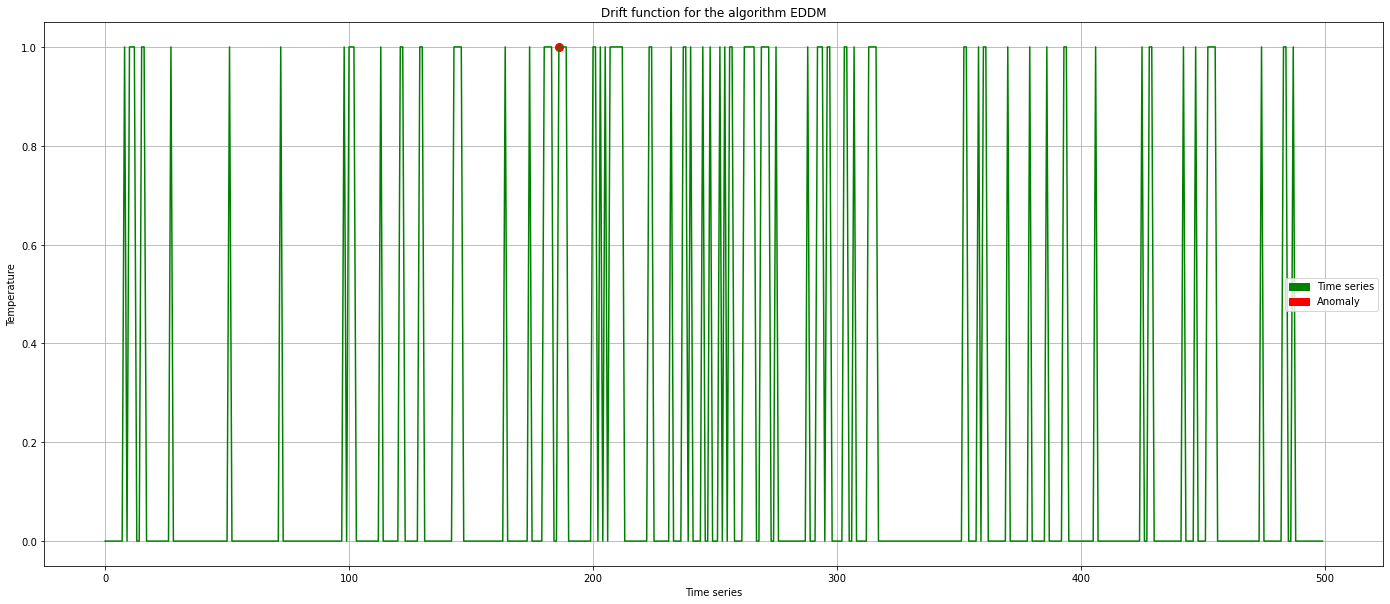

In [248]:
changes =drift_flow(stream, DDM(), 'EDDM', 0, 500)

HDDM_A Detected changes: 0
HDDM_A Detected warning zones: 0


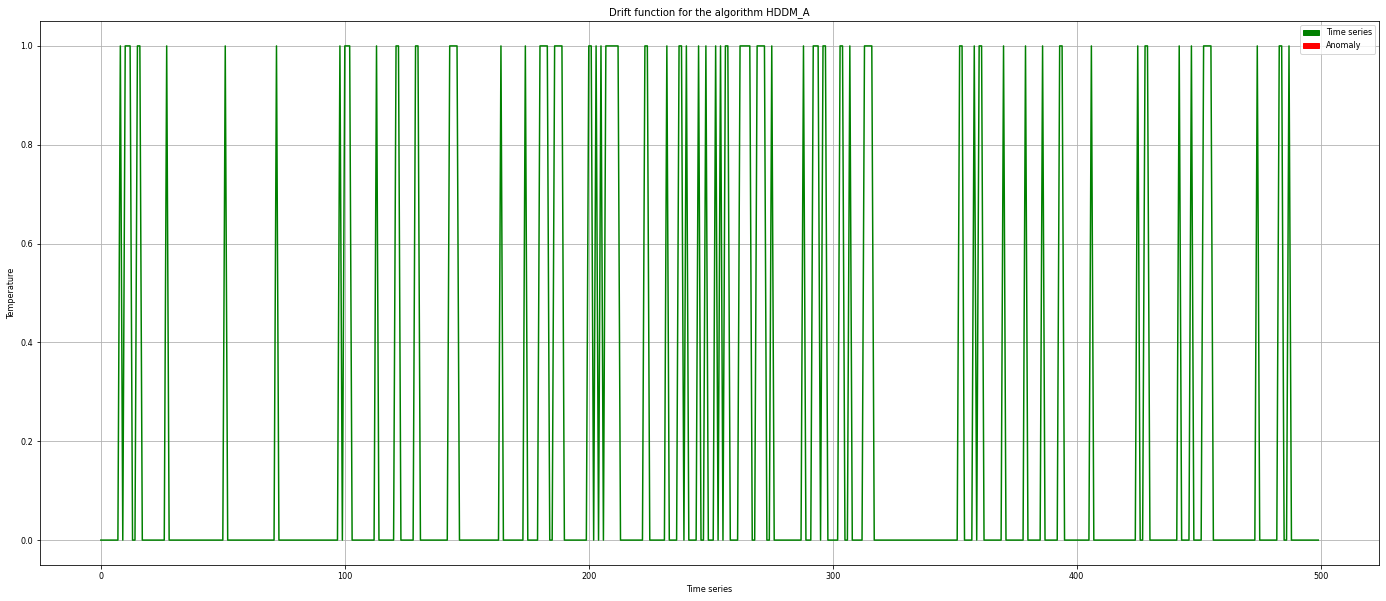

In [262]:
changes_1 =drift_flow(stream, HDDM_A(), 'HDDM_A', 0, 500)

In [ ]:

#drift_flow(stream, EDDM(), 'EDDM', 0, 500)
#drift_flow(stream, HDDM_A(), 'HDDM_A', 0, 500)
#drift_flow(stream, HDDM_W(), 'HDDM_W', 0, 500)
#drift_flow(stream, PageHinkley(), 'PH', 0, 500)
#drift_flow(stream, DDM(), 'DDM', 0, 500)

In [254]:
from skmultiflow.trees import HoeffdingTree
from skmultiflow.trees import HoeffdingAdaptiveTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential

In [253]:
cfiers=[HoeffdingTree(), HoeffdingAdaptiveTreeClassifier()]

In [257]:
from skmultiflow.data import FileStream

In [258]:
stream_1 = FileStream(PATH)

In [255]:
eval = EvaluatePrequential(show_plot = True, metrics = ['accuracy','kappa', 'model_size'],n_wait=100)

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...


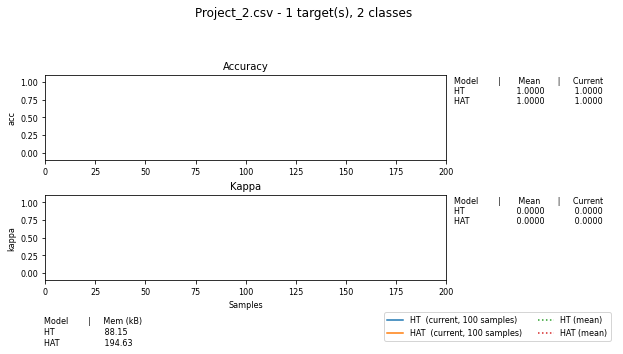

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #------------------- [5%] [6.83s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ##------------------ [10%] [13.45s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ###----------------- [15%] [19.71s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ####---------------- [20%] [26.13s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #####--------------- [25%] [32.67s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ######-------------- [30%] [39.32s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #######------------- [35%] [46.04s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ########------------ [40%] [53.04s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #########----------- [45%] [59.48s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ##########---------- [50%] [66.97s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ###########--------- [55%] [74.64s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ############-------- [60%] [81.83s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #############------- [65%] [88.91s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ##############------ [70%] [96.07s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ###############----- [75%] [103.35s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ################---- [80%] [110.50s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #################--- [85%] [118.21s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ##################-- [90%] [125.85s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 ###################- [95%] [133.04s]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

 #################### [100%] [140.20s]
Processed samples: 100000
Mean performance:
HT - Accuracy     : 1.0000
HT - Kappa        : 1.0000
HT - Size (kB)          : 88.1523
HAT - Accuracy     : 1.0000
HAT - Kappa        : 1.0000
HAT - Size (kB)          : 199.6064


In [264]:
eval.evaluate(stream = stream_1, model = cfiers, model_names= ['HT', 'HAT']);